In [54]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import matplotlib.pyplot as plt
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.104237s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [55]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.108352s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [56]:
vm.testing_rmse(models, training_df)

{'downhill': 0.62557215708452807,
 'total': 0.4758825856569745,
 'uphill': 0.26229820239674589}

In [57]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.500617,-0.732884,0.382977
seg_distance,0.065173,0.171487,0.539263
seg_maximum_grade,-0.213397,-0.166825,-0.291405
total_rating,1.000000,0.997852,0.999788
uphill_rating,0.997852,1.000000,NaN
downhill_rating,0.999788,NaN,1.000000


In [58]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
athlete_boards = lb.get('athlete', athlete_ratings, board_size='all')
athlete_boards

{'downhill_rating':        athlete_id  downhill_rating
 rank                              
 1         2510671       100.000000
 2         2426313        98.723258
 3         1014624        98.434812
 4         5001009        98.200602
 5          187235        97.863312
 6         6122764        97.217419
 7         5696131        96.932868
 8         1877550        96.897168
 9          422108        96.626924
 10        1146773        96.398206
 11         231057        96.349298
 12        4455879        96.245656
 13        1753866        96.049068
 14        4704283        95.502559
 15          54585        95.314905
 16        3528630        95.218185
 17        2994394        95.213962
 18         368860        95.185413
 19        5115538        95.096368
 20        7014252        95.006413
 21         176720        94.951499
 22        1123159        94.828871
 23        2699187        94.787089
 24         257938        94.778582
 25         249869        94.748389
 26      

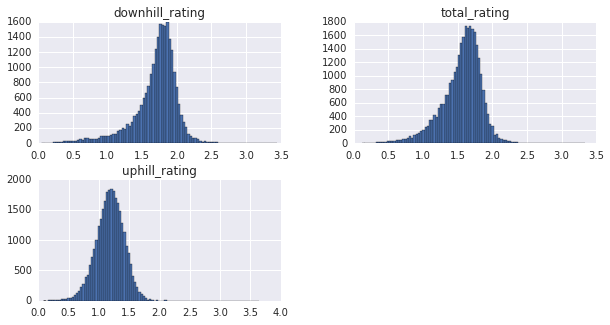

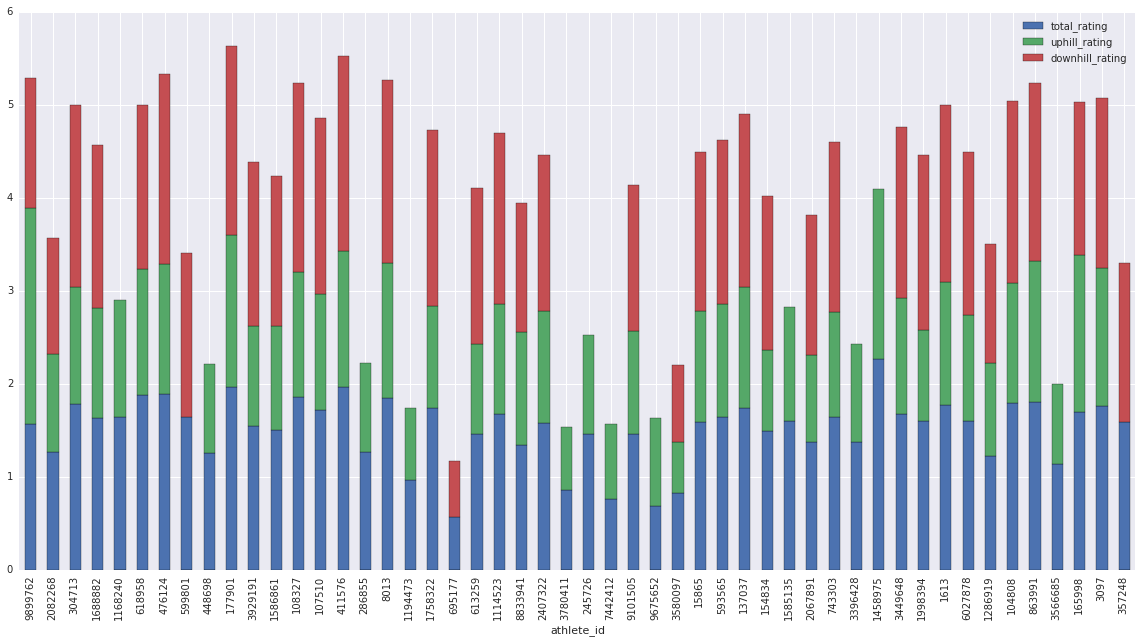

In [59]:
vm.plot_ratings(athlete_ratings)

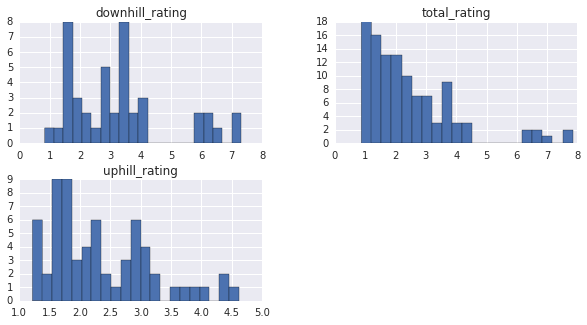

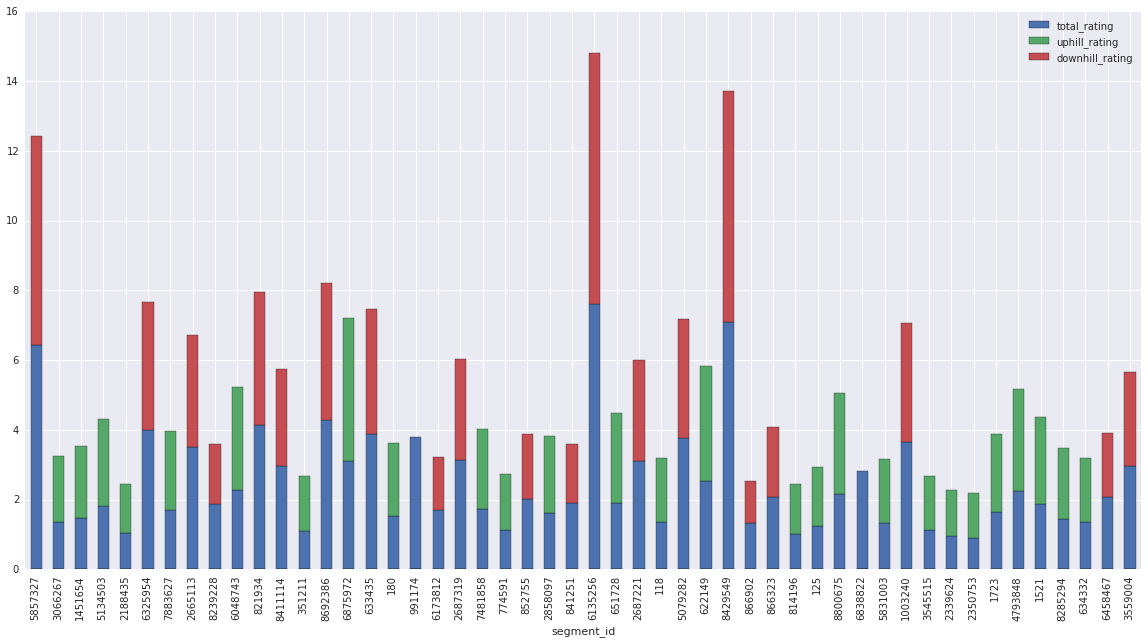

In [60]:
vm.plot_ratings(segment_ratings)

In [61]:
segment_ratings.uphill_rating.idxmin()

8594904

In [62]:
segment_ratings.min()

total_rating       0.871473
uphill_rating      1.213541
downhill_rating    0.831293
dtype: float64

In [63]:
athlete_ratings.ix[6637281]

total_rating       1.566232
uphill_rating      1.177929
downhill_rating    1.546450
Name: 6637281, dtype: float64

In [64]:
(segment_ratings.uphill_rating > -.28).mean()

0.58715596330275233

In [65]:
print(segment_ratings.ix[975395])
print(segment_ratings.ix[651728])
print((segment_ratings.uphill_rating>4.88).mean())
print((segment_ratings.total_rating>-0.42).mean())

total_rating       3.163336
uphill_rating      4.345587
downhill_rating         NaN
Name: 975395, dtype: float64
total_rating       1.918234
uphill_rating      2.572368
downhill_rating         NaN
Name: 651728, dtype: float64
0.0
1.0


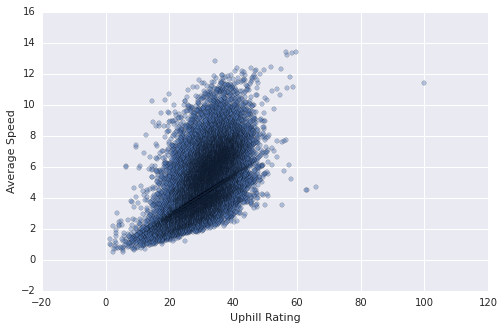

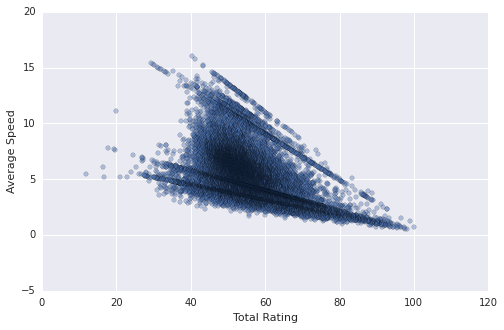

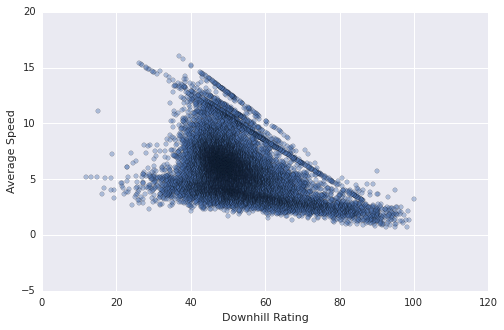

In [66]:
for rating in ['uphill_rating', 'total_rating', 'downhill_rating']:
    pd.merge(athlete_boards[rating].reset_index(), training_df.groupby('athlete_id').average_speed.mean().reset_index(), on='athlete_id').plot(kind='scatter', x=rating, y='average_speed', alpha=0.4, figsize=(8, 5))
    plt.ylabel('Average Speed')
    plt.xlabel(rating.replace('_', ' ').title())

In [67]:
df.query('athlete_id == 979905')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed
359533,95.0,False,2923.2,273,273,979905,4173351,286581459,-5.6,3074.30,-0.2,172.2,0.0,2015-04-11 13:29:14,False,False,151.10,10.707692
613234,48.9,False,1499.5,120,120,979905,3305098,286581459,-8.7,1454.51,7.5,134.9,0.1,2015-04-11 13:20:29,False,False,-44.99,12.495833
1319399,320.3,False,2437.9,220,220,979905,5642079,286581459,5.0,2417.70,63.6,185.4,19.1,2015-04-11 13:24:37,False,False,-20.20,11.081364


In [68]:
df.query('segment_id == 5642079').average_speed.mean()

4.146791111813005

(0, 3)

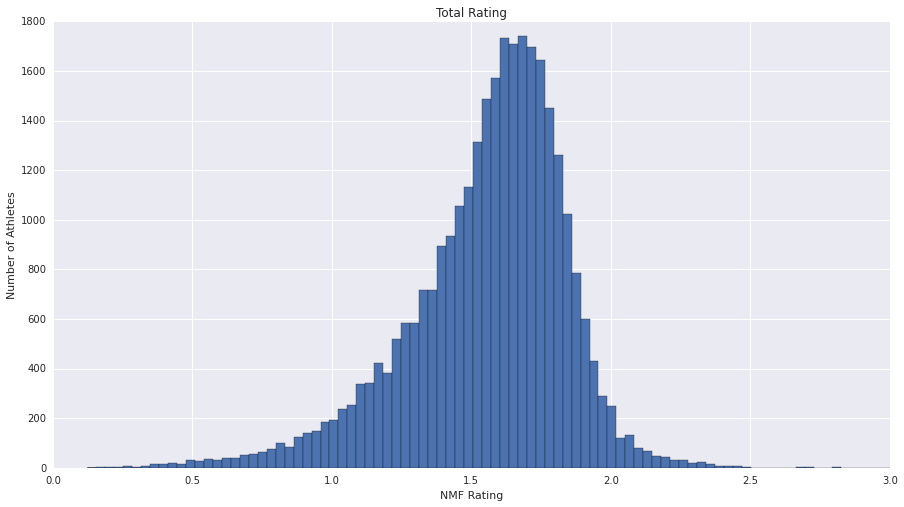

In [69]:
athlete_ratings.total_rating.hist(bins=100, figsize=(15, 8))
plt.title('Total Rating')
plt.xlabel('NMF Rating')
plt.ylabel('Number of Athletes')
plt.xlim(0,3)

In [70]:
training_df.average_speed.std()

3.4652276446036607